In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

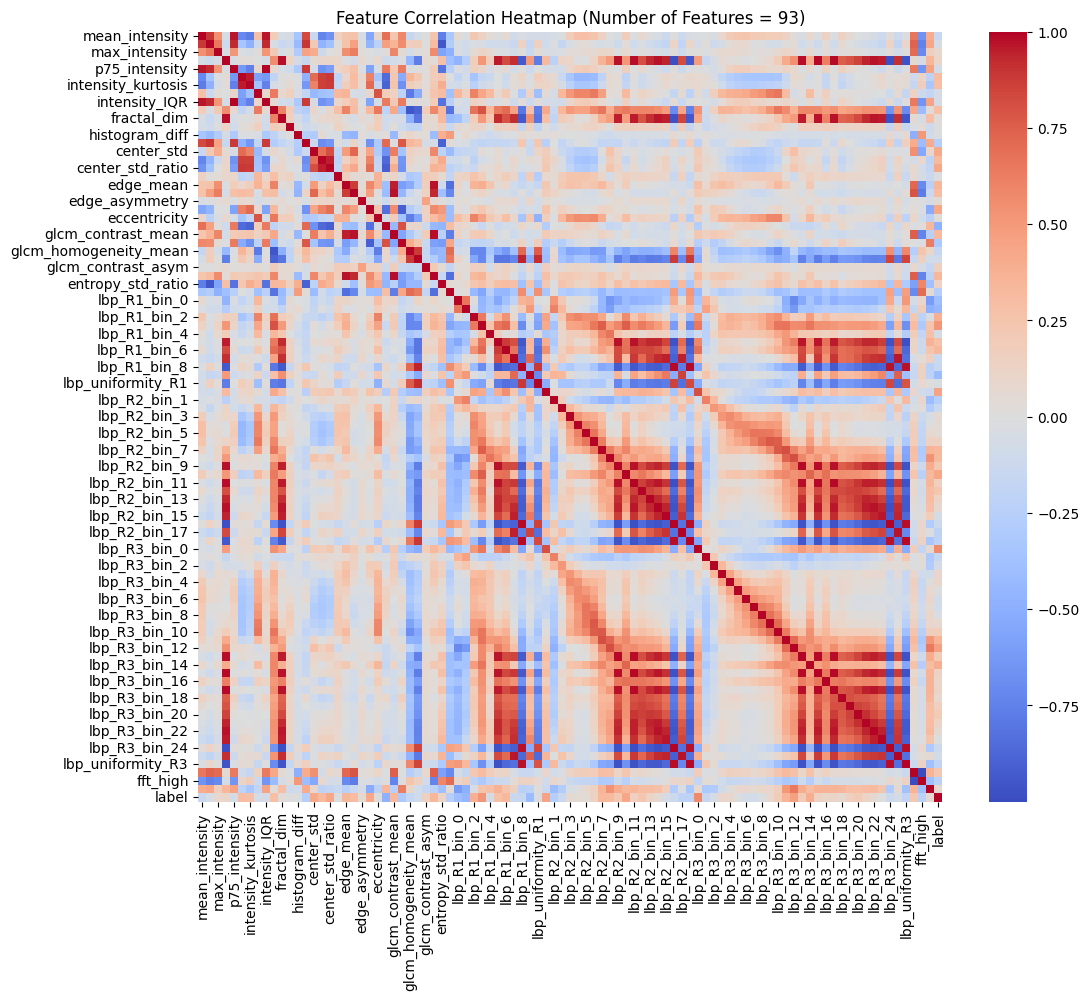

If we drop 24 features, we will have 69 features left.


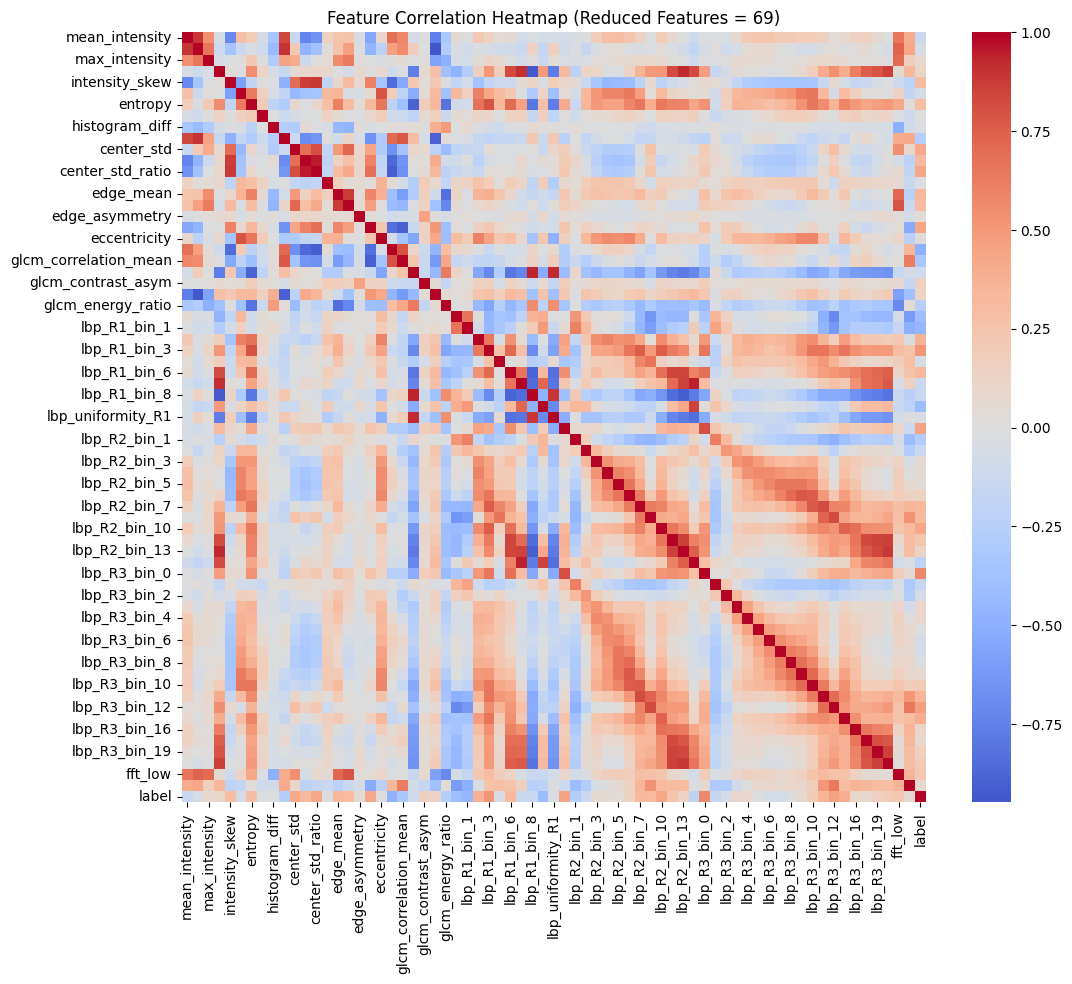

In [12]:

# --- Load Data ---
df = pd.read_csv("train_features.csv")

# --- Label Mapping ---
label_map = {
    0: 'No Impairment',
    1: 'Very Mild Impairment',
    2: 'Mild Impairment',
    3: 'Moderate Impairment'
}
df['label_name'] = df['label'].map(label_map)

# --- Feature Selection (drop labels) ---
numeric_features = df.drop(columns=["label_name"])

# --- Correlation Heatmap ---
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_features.corr(), cmap="coolwarm", center=0)
number_of_features = numeric_features.shape[1]
plt.title("Feature Correlation Heatmap (Number of Features = {})".format(number_of_features))
plt.show()

# --- Remove Highly Correlated Features ---
corr_matrix = numeric_features.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
reduced_features = numeric_features.drop(columns=to_drop)

print(f"If we drop {len(to_drop)} features, we will have {reduced_features.shape[1]} features left.")

plt.figure(figsize=(12, 10))
sns.heatmap(reduced_features.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap (Reduced Features = {})".format(reduced_features.shape[1]))
plt.show()


In [11]:

df_train = pd.read_csv("train_features.csv")
df_val = pd.read_csv("val_features.csv")
df_test = pd.read_csv("test_features.csv")

# --- Label Mapping ---
label_map = {
    0: 'No Impairment',
    1: 'Very Mild Impairment',
    2: 'Mild Impairment',
    3: 'Moderate Impairment'
}
for df in [df_train, df_val, df_test]:
    df['label_name'] = df['label'].map(label_map)

# --- Feature Selection (drop labels) ---
X_train_full = df_train.drop(columns=["label_name"])
X_val_full = df_val.drop(columns=["label_name"])
X_test_full = df_test.drop(columns=["label_name"])

# --- Identify Highly Correlated Features (only from training set) ---
corr_matrix = X_train_full.drop(columns=["label"]).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(f"🔍 Dropped {len(to_drop)} highly correlated features.")

# --- Apply Feature Reduction to All Sets ---
X_train = X_train_full.drop(columns=to_drop)
X_val = X_val_full.drop(columns=to_drop)
X_test = X_test_full.drop(columns=to_drop)

# --- Optional: Add readable labels for reference ---
X_train['label_name'] = df_train['label_name']
X_val['label_name'] = df_val['label_name']
X_test['label_name'] = df_test['label_name']


# --- Create the new datasets without the removed features ---
X_train.to_csv("train_features_reduced.csv", index=False)
X_val.to_csv("val_features_reduced.csv", index=False)
X_test.to_csv("test_features_reduced.csv", index=False)



🔍 Dropped 24 highly correlated features.
